# Identify Fraud from Enron Dataset 
### by Thuy Quach

### 1. Project overview
In 2000, Enron was one of the largest companies in the United States. By 2002, it had collapsed into bankruptcy due to widespread corporate fraud. In the resulting Federal investigation, a significant amount of typically confidential information entered into the public record, including tens of thousands of emails and detailed financial data for top executives. 

In this project, I built a person of interest identifier based on financial and email data made public as a result of the Enron scandal. Person of interest (POI) were who indicted, reached a settlement or plea deal with the government, or testified in exchange for prosecution immunity. I used a combination of email and financial data of 146 executives at Enron to identify POIs.



### 2. Methods

- Exploring Enron dataset
- Feature processing and selections
- Algorithm selections
- Model validation


### 3. Exploring Enron Dataset

In [120]:
import os
os.chdir('/Users/thuy/Google Drive/Introduction to machine learning/ud120-projects/final_project')



In [121]:
import pickle
from pandas import DataFrame
enron_data = pickle.load(open("final_project_dataset.pkl", "r"))


In [122]:
df = DataFrame(enron_data).transpose()
df.describe()

bonus deferral_payments deferred_income director_fees email_address  \
count    146               146             146           146           146   
unique    42                40              45            18           112   
top      NaN               NaN             NaN           NaN           NaN   
freq      64               107              97           129            35   

       exercised_stock_options expenses from_messages from_poi_to_this_person  \
count                      146      146           146                     146   
unique                     102       95            65                      58   
top                        NaN      NaN           NaN                     NaN   
freq                        44       51            60                      60   

       from_this_person_to_poi        ...        long_term_incentive other  \
count                      146        ...                        146   146   
unique                      42        ...                         53    93   
top                        NaN        ...                        NaN   NaN   
freq                        60        ...                         80    53   

          poi restricted_stock restricted_stock_deferred salary  \
count     146              146                       146    146   
unique      2               98                        19     95   
top     False              NaN                       NaN    NaN   
freq      128               36                       128     51   

       shared_receipt_with_poi to_messages total_payments total_stock_value  
count                      146         146            146               146  
unique                      84          87            126               125  
top                        NaN         NaN            NaN               NaN  
freq                        60          60             21                20  

[4 rows x 21 columns]

In [123]:
# number of people
print "There are ", len(enron_data), "excecutives in Enron Dataset"

There are  146 excecutives in Enron Dataset


In [124]:
# name of all the excecutives
print enron_data.keys()

['METTS MARK', 'BAXTER JOHN C', 'ELLIOTT STEVEN', 'CORDES WILLIAM R', 'HANNON KEVIN P', 'MORDAUNT KRISTINA M', 'MEYER ROCKFORD G', 'MCMAHON JEFFREY', 'HORTON STANLEY C', 'PIPER GREGORY F', 'HUMPHREY GENE E', 'UMANOFF ADAM S', 'BLACHMAN JEREMY M', 'SUNDE MARTIN', 'GIBBS DANA R', 'LOWRY CHARLES P', 'COLWELL WESLEY', 'MULLER MARK S', 'JACKSON CHARLENE R', 'WESTFAHL RICHARD K', 'WALTERS GARETH W', 'WALLS JR ROBERT H', 'KITCHEN LOUISE', 'CHAN RONNIE', 'BELFER ROBERT', 'SHANKMAN JEFFREY A', 'WODRASKA JOHN', 'BERGSIEKER RICHARD P', 'URQUHART JOHN A', 'BIBI PHILIPPE A', 'RIEKER PAULA H', 'WHALEY DAVID A', 'BECK SALLY W', 'HAUG DAVID L', 'ECHOLS JOHN B', 'MENDELSOHN JOHN', 'HICKERSON GARY J', 'CLINE KENNETH W', 'LEWIS RICHARD', 'HAYES ROBERT E', 'MCCARTY DANNY J', 'KOPPER MICHAEL J', 'LEFF DANIEL P', 'LAVORATO JOHN J', 'BERBERIAN DAVID', 'DETMERING TIMOTHY J', 'WAKEHAM JOHN', 'POWERS WILLIAM', 'GOLD JOSEPH', 'BANNANTINE JAMES M', 'DUNCAN JOHN H', 'SHAPIRO RICHARD S', 'SHERRIFF JOHN R', 'SHELBY 

There are one name that was not a person name 'THE TRAVEL AGENCY IN THE PARK'. This was an outlier.

In [125]:
enron_data.pop('THE TRAVEL AGENCY IN THE PARK', 0)

{'bonus': 'NaN',
 'deferral_payments': 'NaN',
 'deferred_income': 'NaN',
 'director_fees': 'NaN',
 'email_address': 'NaN',
 'exercised_stock_options': 'NaN',
 'expenses': 'NaN',
 'from_messages': 'NaN',
 'from_poi_to_this_person': 'NaN',
 'from_this_person_to_poi': 'NaN',
 'loan_advances': 'NaN',
 'long_term_incentive': 'NaN',
 'other': 362096,
 'poi': False,
 'restricted_stock': 'NaN',
 'restricted_stock_deferred': 'NaN',
 'salary': 'NaN',
 'shared_receipt_with_poi': 'NaN',
 'to_messages': 'NaN',
 'total_payments': 362096,
 'total_stock_value': 'NaN'}

In [126]:
# number of features
print "There are ", len(enron_data['SKILLING JEFFREY K'].keys()), "features in the Enron Dataset"

There are  21 features in the Enron Dataset


In [127]:
# list of features
print "List of features: " + "\n" + str(enron_data['SKILLING JEFFREY K'].keys())

List of features: 
['salary', 'to_messages', 'deferral_payments', 'total_payments', 'exercised_stock_options', 'bonus', 'restricted_stock', 'shared_receipt_with_poi', 'restricted_stock_deferred', 'total_stock_value', 'expenses', 'loan_advances', 'from_messages', 'other', 'from_this_person_to_poi', 'poi', 'director_fees', 'deferred_income', 'long_term_incentive', 'email_address', 'from_poi_to_this_person']


In [128]:
# count people of interest
count_poi = 0
poi_name = []
for entry in enron_data:
    if enron_data[entry]['poi'] == 1:
        count_poi += 1
        poi_name.append(entry)
print "There are " + str(count_poi) + " person of interest."
print poi_name

There are 18 person of interest.
['HANNON KEVIN P', 'COLWELL WESLEY', 'RIEKER PAULA H', 'KOPPER MICHAEL J', 'SHELBY REX', 'DELAINEY DAVID W', 'LAY KENNETH L', 'BOWEN JR RAYMOND M', 'BELDEN TIMOTHY N', 'FASTOW ANDREW S', 'CALGER CHRISTOPHER F', 'RICE KENNETH D', 'SKILLING JEFFREY K', 'YEAGER F SCOTT', 'HIRKO JOSEPH', 'KOENIG MARK E', 'CAUSEY RICHARD A', 'GLISAN JR BEN F']


Let's explore something more about those POIs. 

In [129]:
#How many data have “NaN” for their "long-term-incentives"
count_total_incentives_NaN = 0
for entry in enron_data:
    if enron_data[entry]['long_term_incentive'] == 'NaN':
        count_total_incentives_NaN += 1
print 'NaN data for long_term_incentives:', count_total_incentives_NaN


NaN data for long_term_incentives: 79


In [130]:
#How many folks in this dataset have a 'NaN' salary? 
count_salary = 0
for entry in enron_data:
    if enron_data[entry]['salary'] == 'NaN':
        count_salary +=1
print 'NaN for salary:', count_salary

NaN for salary: 50


In [131]:
# Any data that all 'NaN' in main features:
for entry in enron_data:
    if enron_data[entry]['director_fees'] == 'NaN' and enron_data[entry]['total_stock_value'] == 'NaN' and enron_data[entry]['total_payments'] == 'NaN':
        print entry

LOCKHART EUGENE E


In [132]:
enron_data['LOCKHART EUGENE E']

{'bonus': 'NaN',
 'deferral_payments': 'NaN',
 'deferred_income': 'NaN',
 'director_fees': 'NaN',
 'email_address': 'NaN',
 'exercised_stock_options': 'NaN',
 'expenses': 'NaN',
 'from_messages': 'NaN',
 'from_poi_to_this_person': 'NaN',
 'from_this_person_to_poi': 'NaN',
 'loan_advances': 'NaN',
 'long_term_incentive': 'NaN',
 'other': 'NaN',
 'poi': False,
 'restricted_stock': 'NaN',
 'restricted_stock_deferred': 'NaN',
 'salary': 'NaN',
 'shared_receipt_with_poi': 'NaN',
 'to_messages': 'NaN',
 'total_payments': 'NaN',
 'total_stock_value': 'NaN'}

So this person LOCKHART EUGENE E had all the features in NaN and was not a POI. This person was an outlier

In [133]:
enron_data.pop('LOCKHART EUGENE E', 0)

{'bonus': 'NaN',
 'deferral_payments': 'NaN',
 'deferred_income': 'NaN',
 'director_fees': 'NaN',
 'email_address': 'NaN',
 'exercised_stock_options': 'NaN',
 'expenses': 'NaN',
 'from_messages': 'NaN',
 'from_poi_to_this_person': 'NaN',
 'from_this_person_to_poi': 'NaN',
 'loan_advances': 'NaN',
 'long_term_incentive': 'NaN',
 'other': 'NaN',
 'poi': False,
 'restricted_stock': 'NaN',
 'restricted_stock_deferred': 'NaN',
 'salary': 'NaN',
 'shared_receipt_with_poi': 'NaN',
 'to_messages': 'NaN',
 'total_payments': 'NaN',
 'total_stock_value': 'NaN'}

Let's exploring some bivariative relationship between some quantitative features from the Enron dataset. 

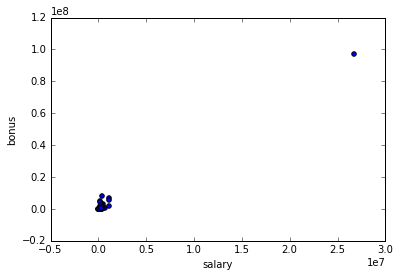

In [134]:
# salary vs. bonus
import sys
import matplotlib.pyplot
sys.path.append("../tools/")
from feature_format import featureFormat, targetFeatureSplit
%matplotlib inline

### read in data dictionary, convert to numpy array
data_dict = pickle.load( open("../final_project/final_project_dataset.pkl", "r") )
features = ["salary", "bonus"]
data = featureFormat(data_dict, features)


### your code below
for point in data:
    salary = point[0]
    bonus = point[1]
    matplotlib.pyplot.scatter( salary, bonus )

matplotlib.pyplot.xlabel("salary")
matplotlib.pyplot.ylabel("bonus")
matplotlib.pyplot.show()

We could see that there was an outlier that was extremely higher than the rest of the data. Let's come back to the dataset and see what was the data point.

In [135]:
# remove NaN's and find max salary 
salary_list = []
for entry in enron_data:
    if type (enron_data[entry]['salary']) == int :
        salary_list.append(enron_data[entry]['salary'])
print "Total people with salary: " + str(len(salary_list))
print "Maxium salary was " + str(max(salary_list))

Total people with salary: 95
Maxium salary was 26704229


In [136]:
# find person with max salary
for entry in enron_data:
    if enron_data[entry]['salary'] == 26704229:
        print "Name of person with maximum salary " + entry

Name of person with maximum salary TOTAL


So, the outlier was the TOTAL salary and bonus. I removed it from the dataset

In [137]:
# remove outlier from the data
enron_data.pop('TOTAL',0)

{'bonus': 97343619,
 'deferral_payments': 32083396,
 'deferred_income': -27992891,
 'director_fees': 1398517,
 'email_address': 'NaN',
 'exercised_stock_options': 311764000,
 'expenses': 5235198,
 'from_messages': 'NaN',
 'from_poi_to_this_person': 'NaN',
 'from_this_person_to_poi': 'NaN',
 'loan_advances': 83925000,
 'long_term_incentive': 48521928,
 'other': 42667589,
 'poi': False,
 'restricted_stock': 130322299,
 'restricted_stock_deferred': -7576788,
 'salary': 26704229,
 'shared_receipt_with_poi': 'NaN',
 'to_messages': 'NaN',
 'total_payments': 309886585,
 'total_stock_value': 434509511}

In [138]:
import numpy as np
# mean salary
print "Average salary: " + str(int(np.mean(salary_list)))


Average salary: 562194


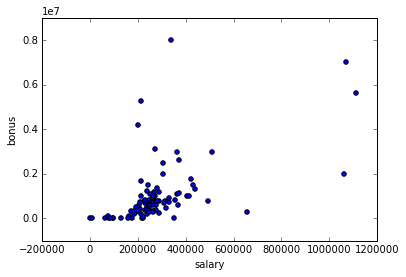

In [139]:
data_dict = pickle.load( open("../final_project/final_project_dataset.pkl", "r") )
data_dict.pop('TOTAL', 0)
features = ["salary", "bonus"]
data = featureFormat(data_dict, features)


### your code below
for point in data:
    salary = point[0]
    bonus = point[1]
    matplotlib.pyplot.scatter( salary, bonus )

matplotlib.pyplot.xlabel("salary")
matplotlib.pyplot.ylabel("bonus")
matplotlib.pyplot.show()

We would argue that there’s 4 more outliers to investigate; let's look at a couple of them. Two people made bonuses of at least 5 million dollars, and a salary of over 1 million dollars; in other words, they made out like bandits. What are the names associated with those point? Are they POIs?

In [140]:
# catch outliers with high salary
from pprint import pprint
outliers_salary = []
for key in enron_data:
    val = enron_data[key]['salary']
    if val == 'NaN':
        continue
    outliers_salary.append((key,int(val)))

top_4 = sorted(outliers_salary,key=lambda x:x[1],reverse=True)[:4]

pprint(top_4)

[('SKILLING JEFFREY K', 1111258),
 ('LAY KENNETH L', 1072321),
 ('FREVERT MARK A', 1060932),
 ('PICKERING MARK R', 655037)]


In [141]:
# are they POIs?
for people in top_4:
    if enron_data[people[0]]['poi'] == 1:
        print people[0]

SKILLING JEFFREY K
LAY KENNETH L


So, there were two of top 4 outlier salary were POIs. 

### 4. Features processing

The data has been cleaned. Next step I added a new feature. From the intuition about the data, I guessed that the more message exchanged among POIs (fraction of from_this_person_to_poi and from_poi_to_this_person to total_message) the more chance of the person is POI. 

In [142]:

def get_total_list(key1, key2):
    'combine 2 lists in one, assign NaN to 0'
    new_list = []
    for i in enron_data:
        # assign NaN to 0
        if enron_data[i][key1] == 'NaN' or enron_data[i][key2] == 'NaN':
            new_list.append(0.)
        elif enron_data[i][key1]>=0:
            new_list.append(float(enron_data[i][key1]) + float(enron_data[i][key2]))
    return new_list

In [143]:
# get the total poi related emails:
total_poi_emails = get_total_list('from_this_person_to_poi', 'from_poi_to_this_person')

In [144]:
# get the total emails
total_emails = get_total_list('to_messages', 'from_messages')



In [145]:
def fraction_list(list1, list2):
    'devide one list by other'
    fraction = []
    for i in range(0,len(list1)):
        if list2[i] == 0.0:
            fraction.append(0.0)
                #print list2[j]
                #fraction.append(0.0)
        else:
            fraction.append(float(list1[i])/float(list2[i]))
            #print fraction
    return fraction

In [146]:
# get the fraction of poi emails
fraction_poi_emails = fraction_list(total_poi_emails, total_emails)


In [147]:
# add this new feature to my data
count = 0
for i in enron_data:
    enron_data[i]['fraction_poi_emails'] = fraction_poi_emails[count]
    count += 1

# test
print 'SKILLING fraction_poi_emails: ', enron_data['SKILLING JEFFREY K']['fraction_poi_emails']
    


SKILLING fraction_poi_emails:  0.031593038822


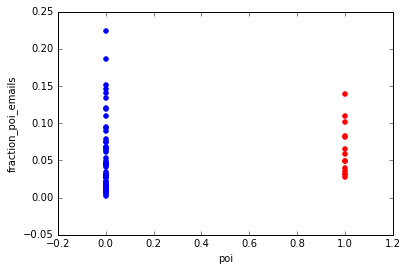

In [148]:
# let's test if this feature has any correlation with POIs
new_features_list = ['poi', 'fraction_poi_emails']
data = featureFormat(enron_data, new_features_list)

%matplotlib inline
### your code below
for point in data:
    poi = point[0]
    fraction_poi_emails = point[1]
    #matplotlib.pyplot.boxplot( data )
    if point[0] == 1:
        matplotlib.pyplot.scatter(poi, fraction_poi_emails, color = 'r')
    else:
        matplotlib.pyplot.scatter(poi, fraction_poi_emails, color = 'b')
    #matplotlib.pyplot.boxplot(data)
matplotlib.pyplot.xlabel("poi")
matplotlib.pyplot.ylabel("fraction_poi_emails")
matplotlib.pyplot.show()


I can see the different of fraction of poi and non-poi emails. Let's use this new feature to see if it improves the classifier.

#### Original features

In [149]:
import pickle
import sys
sys.path.append("../tools/")
from feature_format import featureFormat, targetFeatureSplit
from sklearn.cross_validation import train_test_split
import numpy as np
np.random.seed(42)
from time import time
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

# load the data
data_dict = pickle.load(open("../final_project/final_project_dataset.pkl", "r") )

# features_list
features_list = ['poi','salary', 'from_poi_to_this_person', 'from_this_person_to_poi', 'to_messages', 'deferral_payments', 'total_payments', 'exercised_stock_options', 'bonus', 'restricted_stock', 'shared_receipt_with_poi', 'restricted_stock_deferred', 'total_stock_value', 'expenses', 'loan_advances', 'from_messages', 'other', 'director_fees', 'deferred_income', 'long_term_incentive']

data = featureFormat(data_dict, features_list)
labels, features = targetFeatureSplit(data)

# split data inton training and testing
features_train, features_test, labels_train, labels_test = train_test_split(features, labels, test_size = 0.4, random_state = 42)

# choose decision tree
from sklearn.tree import DecisionTreeClassifier
t0 = time()
clf = DecisionTreeClassifier()
clf = clf.fit(features_train, labels_train)
pred = clf.predict(features_test)

from sklearn.metrics import accuracy_score
acc = accuracy_score(labels_test, pred)
print 'Accuracy: ' + str(acc)
print 'Precision: ', precision_score(labels_test, pred)
print 'Recall: ', recall_score(labels_test, pred)
print 'Decision Tree algorithm run time: ', round(time()-t0, 3), 's'


# list of importance features
importances = clf.feature_importances_
indices = np.argsort(importances)[::-1]
print 'Feature Ranking: '
for i in range(10):
    print "{} feature {} ({})".format(i+1,features_list[i+1],importances[indices[i]])

Accuracy: 0.844827586207
Precision:  0.333333333333
Recall:  0.125
Decision Tree algorithm run time:  0.003 s
Feature Ranking: 
1 feature salary (0.337437907714)
2 feature from_poi_to_this_person (0.161410018553)
3 feature from_this_person_to_poi (0.109563164109)
4 feature to_messages (0.101688311688)
5 feature deferral_payments (0.0753246753247)
6 feature total_payments (0.0753246753247)
7 feature exercised_stock_options (0.0564935064935)
8 feature bonus (0.048961038961)
9 feature restricted_stock (0.0337967018319)
10 feature shared_receipt_with_poi (0.0)


#### Add new features

The new features improved recall but not accuracy and precision. So, I decided not to use the new feature.

For feature ranking, it first looked like the feature ranking just rank to the order of the feature list. This may not work very well. It could be better to use SelectKbest.

Second, I see that though the accuracy was hight 0.84 but the precision and recall was low. The reason was having imbalanced classes like we have in the Enron dataset (many more non-POIs than POIs) introduces some special challenges, namely that I can just guess the more common class label for every point, not a very insightful strategy, and still get pretty good accuracy. Precision and recall can help illuminate my performance better.

Now let's run SelectKbest

In [183]:
import pickle
import sys
sys.path.append("../tools/")
from feature_format import featureFormat, targetFeatureSplit
from sklearn.cross_validation import train_test_split
import numpy as np
np.random.seed(42)
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.grid_search import GridSearchCV
from sklearn.pipeline import Pipeline

# load the data
with open("final_project_dataset.pkl", "r") as data_file:
    data_dict = pickle.load(data_file)

### Task 2: Remove outliers
data_dict.pop('THE TRAVEL AGENCY IN THE PARK', 0)
data_dict.pop('LOCKHART EUGENE E', 0)
data_dict.pop('TOTAL',0)

# featureas_list
features_list = ['poi', 'salary', 'to_messages', 'deferral_payments', 'total_payments', 'exercised_stock_options', 'bonus', 'restricted_stock', 'shared_receipt_with_poi', 'restricted_stock_deferred', 'total_stock_value', 'expenses', 'loan_advances', 'from_messages', 'other', 'from_this_person_to_poi', 'poi', 'director_fees', 'deferred_income', 'long_term_incentive', 'from_poi_to_this_person']

data = featureFormat(data_dict, features_list)
labels, features = targetFeatureSplit(data)

# split data inton training and testing
features_train, features_test, labels_train, labels_test = train_test_split(features, labels, test_size = 0.4, random_state = 42)
from sklearn.feature_selection import SelectKBest
selector = SelectKBest(k=10)
selectedFeatures = selector.fit(features,labels)
feature_names = [features_list[i] for i in selectedFeatures.get_support(indices=True)]
print 'Best features: ', feature_names

Best features:  ['poi', 'deferral_payments', 'total_payments', 'exercised_stock_options', 'bonus', 'restricted_stock', 'restricted_stock_deferred', 'from_this_person_to_poi', 'director_fees', 'deferred_income']


Let's use the features and run the again the Decision Tree to see any improvement

In [184]:
import pickle
import sys
sys.path.append("../tools/")
from feature_format import featureFormat, targetFeatureSplit
from sklearn.cross_validation import train_test_split
import numpy as np
np.random.seed(42)
from time import time
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

# load the data
data_dict = pickle.load(open("../final_project/final_project_dataset.pkl", "r") )

# features_list
features_list = ['poi','deferral_payments', 'exercised_stock_options', 'bonus', 'restricted_stock_deferred', 'total_stock_value', 'expenses', 'from_messages', 'deferred_income']

data = featureFormat(data_dict, features_list)
labels, features = targetFeatureSplit(data)

# split data inton training and testing
features_train, features_test, labels_train, labels_test = train_test_split(features, labels, test_size = 0.4, random_state = 42)

# choose decision tree
from sklearn.tree import DecisionTreeClassifier
t0 = time()
clf = DecisionTreeClassifier()
clf = clf.fit(features_train, labels_train)
pred = clf.predict(features_test)

from sklearn.metrics import accuracy_score
acc = accuracy_score(labels_test, pred)

print 'Accuracy: ' + str(acc)
print 'Precision: ', precision_score(labels_test, pred)
print 'Recall: ', recall_score(labels_test, pred)
print 'F1 score:', f1_score(labels_test, pred)
print 'Decision Tree algorithm run time: ', round(time()-t0, 3), 's'



Accuracy: 0.719298245614
Precision:  0.214285714286
Recall:  0.375
F1 score: 0.272727272727
Decision Tree algorithm run time:  0.006 s


The selected features improved the Decision tree performance. The accuracy increased from 0.84 to 0.86, the precision and recall was much better with value of 0.5 and 0.375 respectively.



Accuracy is the number of accurate prediction divided by all data points. Precision was total true positive divided by total true positive and false postitive. Recall was total true positive divided by total true positive and false negative.

So, I used MinMax scaler to do features scaling.
One thing I noticed when using train_test_split was that my algorithm didn't give stable results.  It could be explain that the data set was very small. Therefore I change to used cross validation with StratifiedShuffleSplit. Let's see what are best features

In [194]:
import numpy as np

np.random.seed(42)
data_dict = pickle.load(open("../final_project/final_project_dataset.pkl", "r") )
data_dict.pop('THE TRAVEL AGENCY IN THE PARK', 0)
data_dict.pop('LOCKHART EUGENE E', 0)
data_dict.pop('TOTAL',0)
features_list = ['poi', 'salary', 'from_poi_to_this_person', 'from_this_person_to_poi', 'to_messages', 'deferral_payments', 'total_payments', 'exercised_stock_options', 'bonus', 'restricted_stock', 'shared_receipt_with_poi', 'restricted_stock_deferred', 'total_stock_value', 'expenses', 'loan_advances', 'from_messages', 'other', 'director_fees', 'deferred_income', 'long_term_incentive']

data = featureFormat(data_dict, features_list, sort_keys = True)
labels, features = targetFeatureSplit(data)

# Create Min/Max Scaler
from sklearn import preprocessing
scaler = preprocessing.MinMaxScaler()
# Scale Features
features = scaler.fit_transform(features)
from sklearn.cross_validation import StratifiedShuffleSplit
cv_split = StratifiedShuffleSplit(labels, n_iter = 10, test_size = 0.3, random_state = 42)
for train_idx, test_idx in cv_split: 
    features_train = []
    features_test  = []
    labels_train   = []
    labels_test    = []
    for ii in train_idx:
        features_train.append(features[ii])
        labels_train.append(labels[ii])
    for jj in test_idx:
        features_test.append(features[jj])
        labels_test.append(labels[jj])
from sklearn.feature_selection import SelectKBest
selector = SelectKBest(k=15)
selectedFeatures = selector.fit(features,labels)
feature_names = [features_list[i] for i in selectedFeatures.get_support(indices=True)]
print 'Best features: ', feature_names

Best features:  ['poi', 'salary', 'from_poi_to_this_person', 'deferral_payments', 'total_payments', 'exercised_stock_options', 'bonus', 'restricted_stock', 'restricted_stock_deferred', 'total_stock_value', 'expenses', 'from_messages', 'other', 'director_fees', 'deferred_income']


From the SelectKbest and my data intuition, I decided to go with those features:
['poi', 'salary', 'from_poi_to_this_person', 'from_this_person_to_poi', 'restricted_stock', 'bonus', 'expenses', 'deferred_income']

Let's test on several algorithms

### 5.  Algorithm Validation and Selection

#### Decision Tree

In [195]:
import numpy as np

np.random.seed(42)
data_dict = pickle.load(open("../final_project/final_project_dataset.pkl", "r") )
data_dict.pop('THE TRAVEL AGENCY IN THE PARK', 0)
data_dict.pop('LOCKHART EUGENE E', 0)
data_dict.pop('TOTAL',0)
features_list = ['poi', 'salary', 'from_poi_to_this_person', 'from_this_person_to_poi', 'restricted_stock', 'bonus', 'expenses', 'deferred_income']

data = featureFormat(data_dict, features_list, sort_keys = True)
labels, features = targetFeatureSplit(data)

# Create Min/Max Scaler
from sklearn import preprocessing
scaler = preprocessing.MinMaxScaler()
# Scale Features
features = scaler.fit_transform(features)
from sklearn.cross_validation import StratifiedShuffleSplit
cv_split = StratifiedShuffleSplit(labels, n_iter = 10, test_size = 0.3, random_state = 42)
for train_idx, test_idx in cv_split: 
    features_train = []
    features_test  = []
    labels_train   = []
    labels_test    = []
    for ii in train_idx:
        features_train.append(features[ii])
        labels_train.append(labels[ii])
    for jj in test_idx:
        features_test.append(features[jj])
        labels_test.append(labels[jj])
clf = DecisionTreeClassifier()
clf = clf.fit(features_train, labels_train)
pred = clf.predict(features_test)

from sklearn.metrics import accuracy_score
acc = accuracy_score(labels_test, pred)

print 'Accuracy: ' + str(acc)
print 'Precision: ', precision_score(labels_test, pred)
print 'Recall: ', recall_score(labels_test, pred)
print 'F1 score:', f1_score(labels_test, pred)
print 'Decision Tree algorithm run time: ', round(time()-t0, 3), 's'

Accuracy: 0.829268292683
Precision:  0.428571428571
Recall:  0.5
F1 score: 0.461538461538
Decision Tree algorithm run time:  819.501 s


Decision tree improved a lot with new features. With the small samples like that Naive Bayes may not work very well. So, let's try Random Forest, Adaboost and Nearest Centroid. 

#### Random Forest

In [173]:

from sklearn.ensemble import RandomForestClassifier
t0 = time()
clf_rdf = RandomForestClassifier()
clf_rdf = clf_rdf.fit(features_train, labels_train)
pred = clf_rdf.predict(features_test)
from sklearn.metrics import accuracy_score
acc = accuracy_score(labels_test, pred)
print 'Accuracy: ' + str(acc)
print 'Precision: ', precision_score(labels_test, pred)
print 'Recall: ', recall_score(labels_test, pred)
print 'F1 score:', f1_score(labels_test, pred)
print 'Random algorithm run time: ', round(time()-t0, 3), 's'

Accuracy: 0.80487804878
Precision:  0.0
Recall:  0.0
F1 score: 0.0
Random algorithm run time:  0.04 s


Accuracy is the same as the decision tree but precision and recall were closed to 0

#### Adaboost

In [174]:
from sklearn.ensemble import AdaBoostClassifier
t0 = time()
clf_adb = AdaBoostClassifier()
clf_adb = clf_adb.fit(features_train, labels_train)
pred = clf_adb.predict(features_test)
from sklearn.metrics import accuracy_score
acc = accuracy_score(labels_test, pred)
print 'Accuracy: ' + str(acc)
print 'Precision: ', precision_score(labels_test, pred)
print 'Recall: ', recall_score(labels_test, pred)
print 'F1 score:', f1_score(labels_test, pred)
print 'Adaboost algorithm run time: ', round(time()-t0, 3), 's'

Accuracy: 0.756097560976
Precision:  0.25
Recall:  0.333333333333
F1 score: 0.285714285714
Adaboost algorithm run time:  0.124 s


Comparing to decision tree, accuracy, recall and precision were lower.

#### Nearest Centroid

In [177]:
from sklearn.neighbors.nearest_centroid import NearestCentroid
t0 = time()
clf_rk = NearestCentroid()
clf_rk = clf_rk.fit(features_train, labels_train)
pred = clf_rk.predict(features_test)
from sklearn.metrics import accuracy_score
acc = accuracy_score(labels_test, pred)
print 'Accuracy: ' + str(acc)
print 'Precision: ', precision_score(labels_test, pred)
print 'Recall: ', recall_score(labels_test, pred)
print 'F1 score:', f1_score(labels_test, pred)
print 'Nearest K algorithm run time: ', round(time()-t0, 3), 's'

Accuracy: 0.80487804878
Precision:  0.4
Recall:  0.666666666667
F1 score: 0.5
Nearest K algorithm run time:  0.004 s


Comparing to decision tree, accuracy and precision were lower but recall was higher.


#### Logistic Regression

In [196]:

from sklearn.linear_model import LogisticRegression
t0 = time()
clf_lr = LogisticRegression()
clf_lr = clf_lr.fit(features_train, labels_train)
pred = clf_lr.predict(features_test)
from sklearn.metrics import accuracy_score
acc = accuracy_score(labels_test, pred)
print 'Accuracy: ' + str(acc)
print 'Precision: ', precision_score(labels_test, pred)
print 'Recall: ', recall_score(labels_test, pred)
print 'F1 score:', f1_score(labels_test, pred)
print 'Logistic regression algorithm run time: ', round(time()-t0, 3), 's'

Accuracy: 0.853658536585
Precision:  0.0
Recall:  0.0
F1 score: 0.0
Logistic regression algorithm run time:  0.005 s


//anaconda/lib/python2.7/site-packages/sklearn/metrics/classification.py:1074: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


#### SVC

In [206]:
from sklearn import svm
t0 = time()
clf = svm.LinearSVC()
clf = clf.fit(features_train, labels_train)
pred = clf.predict(features_test)
from sklearn.metrics import accuracy_score
acc = accuracy_score(labels_test, pred)
print 'Accuracy: ' + str(acc)
print 'Precision: ', precision_score(labels_test, pred)
print 'Recall: ', recall_score(labels_test, pred)
print 'F1 score:', f1_score(labels_test, pred)
print 'SVC algorithm run time: ', round(time()-t0, 3), 's'

Accuracy: 0.853658536585
Precision:  0.5
Recall:  0.166666666667
F1 score: 0.25
SVC algorithm run time:  0.01 s


In [208]:
from sklearn.neighbors import KNeighborsClassifier
t0 = time()
clf = KNeighborsClassifier()
clf = clf.fit(features_train, labels_train)
pred = clf.predict(features_test)
from sklearn.metrics import accuracy_score
acc = accuracy_score(labels_test, pred)
print 'Accuracy: ' + str(acc)
print 'Precision: ', precision_score(labels_test, pred)
print 'Recall: ', recall_score(labels_test, pred)
print 'F1 score:', f1_score(labels_test, pred)
print 'SVC algorithm run time: ', round(time()-t0, 3), 's'
    

Accuracy: 0.80487804878
Precision:  0.0
Recall:  0.0
F1 score: 0.0
SVC algorithm run time:  0.005 s


After trying other algorithms, I decided to go with Decision Tree and Nearest Centroid because of their highest performance regarding overall accuracy, precision, recall and F1 score.

### 6. Tuning by GridSearchCV

Tunning is an important step to identify variable parameters that contribute to optimal performance of an algorithm. One technique is using GridSearchCV where an algorithm will be test with different values of its parameters to select the best value for each parameters.

#### Decision Tree

In [200]:
t0 = time()
param_grid = {
         'min_samples_split': [2, 3, 4, 5, 6, 7, 8],
          'max_depth': [1, 2, 3, 4, 5, 6, 7, 8],
            'max_features': range(3,7)
          }
clf = GridSearchCV(DecisionTreeClassifier(), param_grid)
clf = clf.fit(features_train, labels_train)
print "done in %0.3fs" % (time() - t0)
print "Best estimator found by grid search:"
print clf.best_estimator_

done in 1.575s
Best estimator found by grid search:
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=1,
            max_features=3, max_leaf_nodes=None, min_samples_leaf=1,
            min_samples_split=3, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')


Let's see if the tuned parameters improved the Decision Tree Classifier

In [202]:

from sklearn.tree import DecisionTreeClassifier
t0 = time()
clf = DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=1,
            max_features=3, max_leaf_nodes=None, min_samples_leaf=1,
            min_samples_split=3, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')
clf = clf.fit(features_train, labels_train)
pred = clf.predict(features_test)

from sklearn.metrics import accuracy_score
acc = accuracy_score(labels_test, pred)
print 'Accuracy: ' + str(acc)
print 'Precision: ', precision_score(labels_test, pred)
print 'Recall: ', recall_score(labels_test, pred)
print 'F1 score:', f1_score(labels_test, pred)
print 'Decision Tree algorithm run time: ', round(time()-t0, 3), 's'

Accuracy: 0.853658536585
Precision:  0.0
Recall:  0.0
F1 score: 0.0
Decision Tree algorithm run time:  0.006 s


The Decision Tree works worse with tuned parameters.

#### Nearest Centroid

In [211]:
param_grid = {'shrink_threshold': [0.1, 0.2, 0.4]}
clf = GridSearchCV(NearestCentroid(), param_grid)
clf = clf.fit(features_train, labels_train)
clf = clf.fit(features_train, labels_train)
pred = clf.predict(features_test)

print "Best estimator found by grid search:"
print clf.best_estimator_

Best estimator found by grid search:
NearestCentroid(metric='euclidean', shrink_threshold=0.1)


In [215]:
from sklearn.neighbors.nearest_centroid import NearestCentroid
t0 = time()
clf_rk = NearestCentroid(metric='euclidean', shrink_threshold=0.1)
clf_rk = clf_rk.fit(features_train, labels_train)
pred = clf_rk.predict(features_test)
from sklearn.metrics import accuracy_score
acc = accuracy_score(labels_test, pred)
print 'Accuracy: ' + str(acc)
print 'Precision: ', precision_score(labels_test, pred)
print 'Recall: ', recall_score(labels_test, pred)
print 'F1 score:', f1_score(labels_test, pred)
print 'Nearest K algorithm run time: ', round(time()-t0, 3), 's'

Accuracy: 0.829268292683
Precision:  0.454545454545
Recall:  0.833333333333
F1 score: 0.588235294118
Nearest K algorithm run time:  0.01 s


The tuned parameters did improved Nearest Centroid performance. Let's test using test.py and see the results

In [216]:
dump_classifier_and_data(clf, data_dict, features_list)

In [218]:
test_classifier(clf, data_dict, features_list)

GridSearchCV(cv=None, error_score='raise',
       estimator=NearestCentroid(metric='euclidean', shrink_threshold=None),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'shrink_threshold': [0.1, 0.2, 0.4]},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=0)
	Accuracy: 0.82471	Precision: 0.40772	Recall: 0.50150	F1: 0.44978	F2: 0.47945
	Total predictions: 14000	True positives: 1003	False positives: 1457	False negatives:  997	True negatives: 10543



### 7. Conclusion

After cleaning the data and selecting features, several algorithms were tested their performance. Decision Tree and Nearest Centroid were selected and tunned. Final results found that Nearest Centroid performed the best with tunned parameters. 

Accuracy of the Nearest Centroid can be interpreted as out of 14000 predictions there was 1003 true positives and 10543 true negatives out of 14000 predictions or 83.47%. In other word the likelihood that my classifier can identified a POI person in 83.47%.

Precision of the Nearest Centroid can be interpreted as out of 1003 (true positives) plus 1457 (false positives) there was 1003 true positives. In other word the likelihood that a person is identified as a POI is actually a true POI was 40.77%. 

Recall of the Nearest Centroid can be interpreted as out of 1003 (true positives) plus 997 (false negatives) there was 1003 true positives. In other word the likelihood that my classifer can catch a POI was 44.98%. 

The results were quite good but still have room to improved. One improvement could implement is using natural language processing to understand the email data more. By understand what was exchanged the most among POI messages, we could understand better their relations with fraud. 